In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [57]:
df = pd.read_excel('data.xls')
df

,Дата\Час,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2024-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,2024-01-02,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,2024-01-03,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,2024-01-04,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,2024-01-05,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,2024-01-06,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,2024-01-07,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,2024-01-08,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,2024-01-09,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [58]:
df = df.drop(columns='Дата\Час')
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,84.601,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,91.789,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,90.817,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,95.227,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,92.149,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,83.413,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,90.488,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,136.804,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [65]:
data = np.array(df).flatten()
data, data.shape

(array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  83.915,  74.879,
         71.569,  83.507,  78.556,  84.909,  90.564,  88.909,  82.097,
         92.617,  82.141,  73.942,  66.159,  60.323,  59.934,  58.991,
         65.926,  68.814,  71.955,  83.094,  91.835,  84.601,  81.881,
         79.911,  88.205,  81.72 ,  81.973,  81.159,  81.542,  85.174,
         86.396,  88.637,  99.631,  85.428,  79.096,  75.569,  71.343,
         63.534,  62.93 ,  60.751,  66.287,  75.827,  78.634,  83.226,
         94.694,  91.789,  90.805,  87.272,  84.488,  82.505,  93.846,
         92.801,  97.032,  99.99 ,  95.81 ,  93.359,  95.478, 106.44 ,
         88.563,  74.33 ,  75.556,  63.9  ,  64.464,  62.335,  70.257,
         78.144,  83.858,  82.886,  89.696,  90.817,  86.275,  87.51 ,
         91.513,  84.024,  83.695,  81.513,  84.233,  89.34 ,  95.338,
         91.403, 102.215, 104.527,  94.472,  79.269,  71.686,  68.831,
      

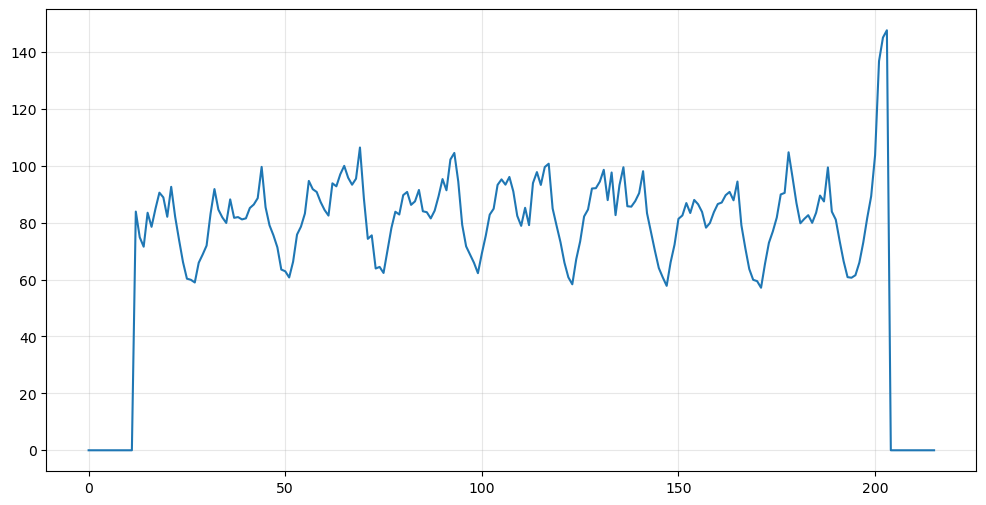

In [69]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.grid('on', alpha=.3);

# 1. Разбиение выборки на обучающие и тестовые подвыборки